## DataFest Python Notebook for Team Nuvon ##

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # colormap

from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Load Data and print head separately ##

In [12]:
import pandas as pd

leases = pd.read_csv("Leases.csv")
leases.head()


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,1.0,Atlanta,10 Glenlake North Tower,Atlanta_Central Perimeter_Atlanta_10 Glenlake ...,10 Glenlake Pky NE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
1,2018,Q1,1.0,Atlanta,100 City View,Atlanta_Northwest_Atlanta_100 City View_3330 C...,3330 Cumberland Blvd,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
2,2018,Q1,1.0,Atlanta,1000 Parkwood,Atlanta_Northwest_Atlanta_1000 Parkwood_1000 P...,1000 Parkwood Cir SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0
3,2018,Q1,1.0,Atlanta,1100 Circle 75,Atlanta_Northwest_Atlanta_1100 Circle 75_1100 ...,1100 Circle 75 Pky SE,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742.0
4,2018,Q1,1.0,Atlanta,1200 Ashwood,Atlanta_Central Perimeter_Atlanta_1200 Ashwood...,1200 Ashwood Pky,South,Atlanta,GA,...,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126.0


In [13]:
occupancy = pd.read_csv("Major Market Occupancy Data-revised.csv")
occupancy.head()


,year,quarter,market,ending_occupancy_proportion,starting_occupancy_proportion,avg_occupancy_proportion
0,2020,Q1,Washington D.C.,0.19,0.98,0.785714
1,2020,Q1,Manhattan,0.08,0.98,0.732857
2,2020,Q1,Chicago,0.14,0.99,0.788571
3,2020,Q1,Houston,0.33,0.99,0.835714
4,2020,Q1,Philadelphia,0.20,0.99,0.817143


In [14]:
price_availability = pd.read_csv("Price and Availability Data.csv")
price_availability.head()


,year,quarter,market,internal_class,RBA,available_space,availability_proportion,internal_class_rent,overall_rent,direct_available_space,direct_availability_proportion,direct_internal_class_rent,direct_overall_rent,sublet_available_space,sublet_availability_proportion,sublet_internal_class_rent,sublet_overall_rent,leasing
0,2018,Q1,Atlanta,A,101140416,20239067,0.200109,27.655891,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1205126
1,2018,Q1,Atlanta,O,65810449,12728989,0.193419,18.560886,24.345689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715742
2,2018,Q1,Austin,A,36815073,4281986,0.116311,40.384706,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1738905
3,2018,Q1,Austin,O,27947525,3360936,0.121082,30.118658,36.596618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185674
4,2018,Q1,Baltimore,A,41033288,6813380,0.166045,27.104835,22.954034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380750


In [15]:
unemployment = pd.read_csv("Unemployment.csv")
unemployment.head()


,year,quarter,month,state,unemployment_rate
0,2018,Q1,1,AZ,4.9
1,2018,Q1,1,CA,4.4
2,2018,Q1,1,CO,2.9
3,2018,Q1,1,DE,4.1
4,2018,Q1,1,DC,5.9


## Merge Data ##

In [16]:
import pandas as pd

# Load datasets
leases = pd.read_csv("Leases.csv")
occupancy = pd.read_csv("Major Market Occupancy Data-revised.csv")
availability = pd.read_csv("Price and Availability Data.csv")
unemployment = pd.read_csv("Unemployment.csv")

# Standardize column names to lowercase
for df in [leases, occupancy, availability, unemployment]:
    df.columns = df.columns.str.lower()

# Start merge chain into a clean final variable
final_data_ccdm_ready = leases.merge(
    availability, on=['year', 'quarter', 'market'], suffixes=('_lease', '_avail'))

final_data_ccdm_ready = final_data_ccdm_ready.merge(
    occupancy[['year', 'quarter', 'market', 'avg_occupancy_proportion']],
    on=['year', 'quarter', 'market'])

final_data_ccdm_ready = final_data_ccdm_ready.merge(
    unemployment[['year', 'quarter', 'state', 'unemployment_rate']],
    on=['year', 'quarter', 'state'])

# Save to disk so it appears in file browser
final_data_ccdm_ready.to_csv("final_data_ccdm_ready.csv", index=False)

# Preview result
print("✅ Final merged dataset saved as 'final_data_ccdm_ready.csv'")
display(final_data_ccdm_ready.head())


✅ Final merged dataset saved as 'final_data_ccdm_ready.csv'


,year,quarter,monthsigned,market,building_name,building_id,address,region,city,state,...,direct_availability_proportion_avail,direct_internal_class_rent_avail,direct_overall_rent_avail,sublet_available_space_avail,sublet_availability_proportion_avail,sublet_internal_class_rent_avail,sublet_overall_rent_avail,leasing_avail,avg_occupancy_proportion,unemployment_rate
0,2020,Q1,1.0,Austin,2800 S Interstate 35,Austin_South_Austin_2800 S Interstate 35_2800 ...,2800 S IH-35,South,Austin,TX,...,0.0726,43.139917,39.859706,1030585.0,0.0153,41.947034,36.341803,1042494,0.82,3.5
1,2020,Q1,1.0,Austin,2800 S Interstate 35,Austin_South_Austin_2800 S Interstate 35_2800 ...,2800 S IH-35,South,Austin,TX,...,0.0726,43.139917,39.859706,1030585.0,0.0153,41.947034,36.341803,1042494,0.82,3.6
2,2020,Q1,1.0,Austin,2800 S Interstate 35,Austin_South_Austin_2800 S Interstate 35_2800 ...,2800 S IH-35,South,Austin,TX,...,0.0726,43.139917,39.859706,1030585.0,0.0153,41.947034,36.341803,1042494,0.82,5.0
3,2020,Q1,1.0,Austin,2800 S Interstate 35,Austin_South_Austin_2800 S Interstate 35_2800 ...,2800 S IH-35,South,Austin,TX,...,0.0433,35.481875,39.859706,487840.0,0.0072,27.690261,36.341803,425956,0.82,3.5
4,2020,Q1,1.0,Austin,2800 S Interstate 35,Austin_South_Austin_2800 S Interstate 35_2800 ...,2800 S IH-35,South,Austin,TX,...,0.0433,35.481875,39.859706,487840.0,0.0072,27.690261,36.341803,425956,0.82,3.6


## Review Collapsed Data ##

In [22]:
# Preview collapsed symbolic manifold
import pandas as pd

ccdm = pd.read_csv("ccdm_selected_features.csv")
print(ccdm.head())

   rba_avail   rba_lease  available_space_avail  available_space_lease  \
0   39304932  28065525.0                5924551              3403248.0   
1   39304932  28065525.0                5924551              3403248.0   
2   39304932  28065525.0                5924551              3403248.0   
3   28065525  28065525.0                3403248              3403248.0   
4   28065525  28065525.0                3403248              3403248.0   

   direct_available_space_avail  direct_available_space_lease  
0                     4893966.0                     2915408.0  
1                     4893966.0                     2915408.0  
2                     4893966.0                     2915408.0  
3                     2915408.0                     2915408.0  
4                     2915408.0                     2915408.0  


## Mapp Data to geo context ##

In [23]:
import pandas as pd

# Load original full dataset and collapsed (filtered) one
df_full = pd.read_csv("final_data_ccdm_ready.csv")
df_collapse = pd.read_csv("ccdm_selected_features.csv")

# Merge on index (they align row-wise)
df_combined = pd.concat([df_full[['market', 'city', 'state', 'region', 'building_name', 'address']], df_collapse], axis=1)

# Save for visualization and inspection
df_combined.to_csv("ccdm_with_location.csv", index=False)

# Preview
print(df_combined.head())

   market    city state region         building_name       address  rba_avail  \
0  Austin  Austin    TX  South  2800 S Interstate 35  2800 S IH-35   39304932   
1  Austin  Austin    TX  South  2800 S Interstate 35  2800 S IH-35   39304932   
2  Austin  Austin    TX  South  2800 S Interstate 35  2800 S IH-35   39304932   
3  Austin  Austin    TX  South  2800 S Interstate 35  2800 S IH-35   28065525   
4  Austin  Austin    TX  South  2800 S Interstate 35  2800 S IH-35   28065525   

    rba_lease  available_space_avail  available_space_lease  \
0  28065525.0                5924551              3403248.0   
1  28065525.0                5924551              3403248.0   
2  28065525.0                5924551              3403248.0   
3  28065525.0                3403248              3403248.0   
4  28065525.0                3403248              3403248.0   

   direct_available_space_avail  direct_available_space_lease  
0                     4893966.0                     2915408.0  
1     

# 🔍 Sort locations by symbolic opportunity gap (available space > leased space)
# Highest values = most underutilized, high-potential regions

In [24]:
import pandas as pd

# Step 1: Load the full merged + location data
df = pd.read_csv("ccdm_with_location.csv")

# Step 2: Copy and create delta column
df_sorted = df.copy()
df_sorted['delta_avail_lease'] = (
    df_sorted['available_space_avail'] - df_sorted['available_space_lease']
)

# Step 3: Sort by descending gradient
df_sorted = df_sorted.sort_values(by='delta_avail_lease', ascending=False)

#Save sorted dataset
df_sorted.to_csv("ccdm_sorted_for_visuals.csv", index=False)

# Optional preview
print(df_sorted[['market', 'city', 'available_space_avail', 'available_space_lease', 'delta_avail_lease']].head())

             market      city  available_space_avail  available_space_lease  \
170521  Los Angeles  Alhambra               43221217             18490079.0   
171793  Los Angeles  Pasadena               43221217             18490079.0   
171788  Los Angeles  Pasadena               43221217             18490079.0   
171787  Los Angeles  Pasadena               43221217             18490079.0   
171786  Los Angeles  Pasadena               43221217             18490079.0   

        delta_avail_lease  
170521         24731138.0  
171793         24731138.0  
171788         24731138.0  
171787         24731138.0  
171786         24731138.0  


## Start Visulizations ##

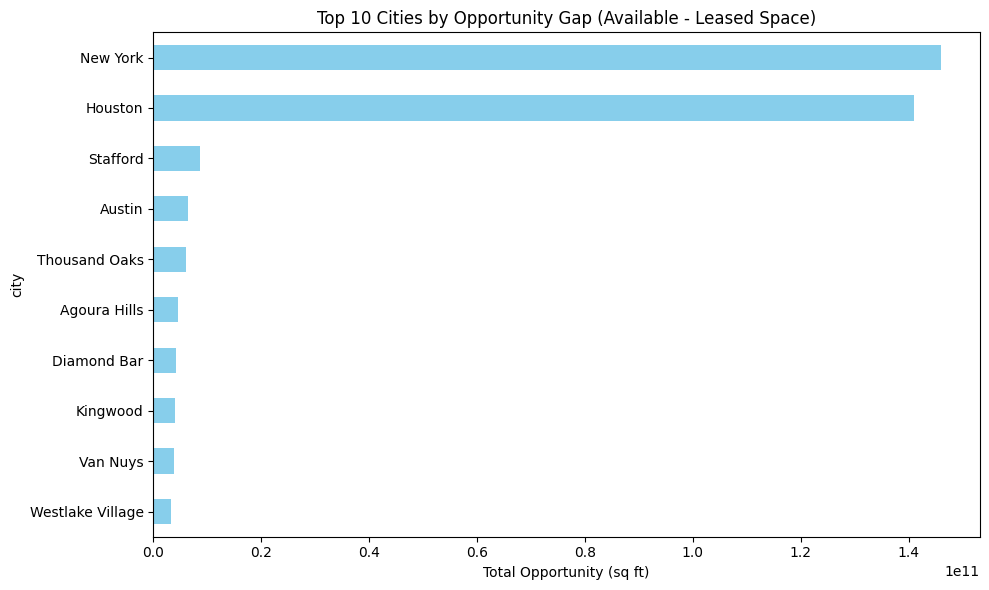

In [25]:
import matplotlib.pyplot as plt

# Group by city and sum delta
city_opportunity = df_sorted.groupby('city')['delta_avail_lease'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
city_opportunity.plot(kind='barh', color='skyblue')
plt.title('Top 10 Cities by Opportunity Gap (Available - Leased Space)')
plt.xlabel('Total Opportunity (sq ft)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

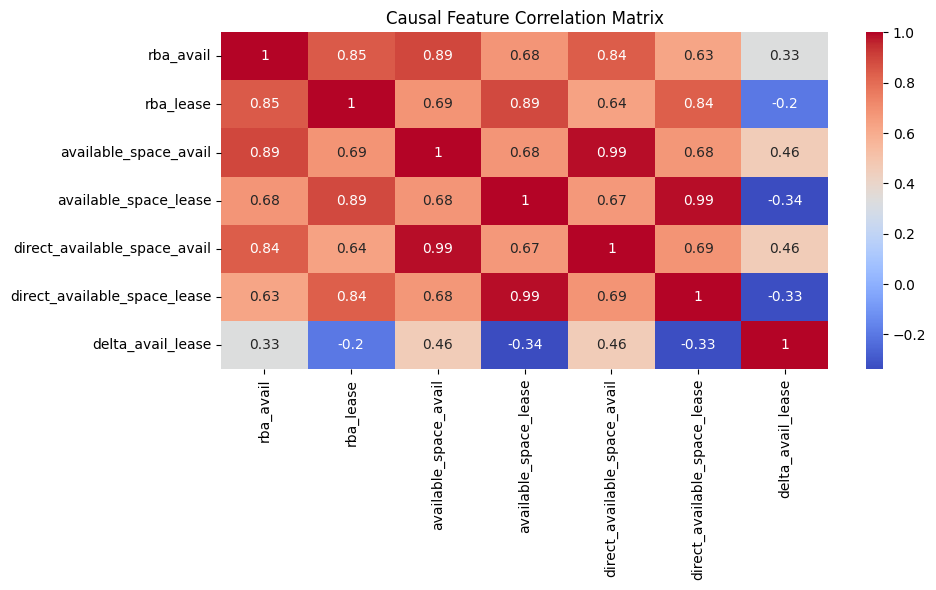

In [26]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df_sorted[['rba_avail', 'rba_lease', 'available_space_avail', 'available_space_lease',
                       'direct_available_space_avail', 'direct_available_space_lease',
                       'delta_avail_lease']].corr(), annot=True, cmap='coolwarm')
plt.title('Causal Feature Correlation Matrix')
plt.tight_layout()
plt.show()

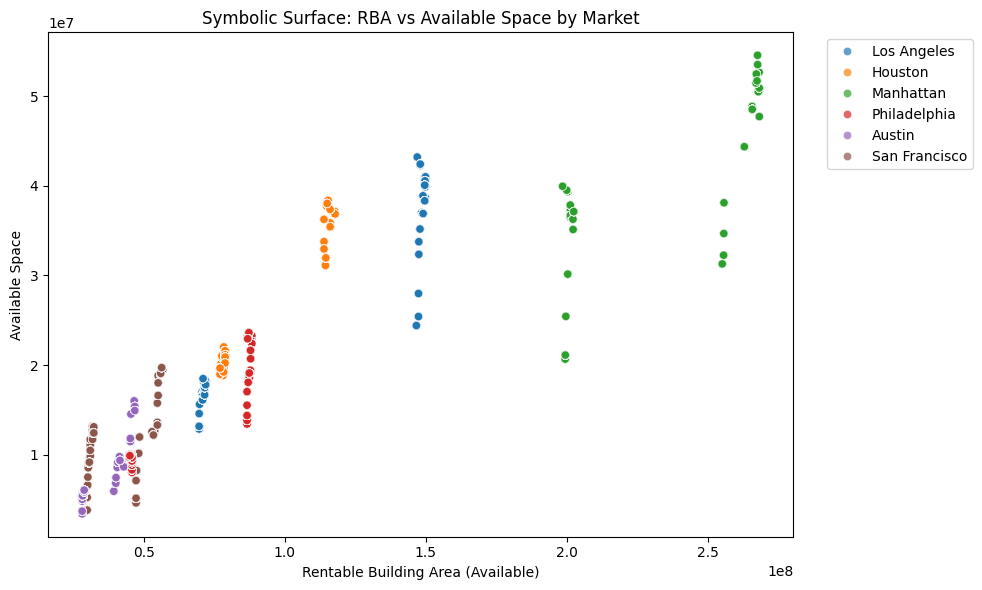

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted, x='rba_avail', y='available_space_avail', hue='market', alpha=0.7)
plt.title('Symbolic Surface: RBA vs Available Space by Market')
plt.xlabel('Rentable Building Area (Available)')
plt.ylabel('Available Space')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()